!conda activate arima

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import pearsonr

In [2]:
import os

In [3]:
os.chdir(r"D:\trading_model")

In [4]:
file_name = "RELIANCE.NS.csv" 
#https://in.finance.yahoo.com/quote/RELIANCE.NS/history?period1=1334448000&period2=1580428800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

## data visualization

In [5]:
df = pd.read_csv(file_name)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-01,1480.000000,1538.349976,1475.949951,1520.349976,1514.662720,18434012.0
1,2020-06-02,1526.000000,1540.000000,1520.800049,1535.699951,1529.955200,10224049.0
2,2020-06-03,1545.000000,1560.000000,1533.349976,1541.650024,1535.883057,11713461.0
3,2020-06-04,1544.000000,1589.500000,1541.000000,1579.800049,1573.890381,15784379.0
4,2020-06-05,1595.000000,1618.000000,1573.699951,1581.699951,1575.783203,15264885.0
...,...,...,...,...,...,...,...
246,2021-05-25,1996.400024,1997.000000,1960.000000,1963.150024,1963.150024,6821015.0
247,2021-05-26,1975.000000,1979.500000,1965.300049,1970.050049,1970.050049,3452113.0
248,2021-05-27,1970.300049,1993.000000,1962.250000,1976.099976,1976.099976,12377100.0
249,2021-05-28,1990.000000,2105.000000,1990.000000,2094.800049,2094.800049,26060864.0


In [6]:
df.dropna(inplace = True)

In [7]:
df.shape

(250, 7)

In [8]:
os.chdir(r"D:\trading_model\images1") #to save results generated in the folder

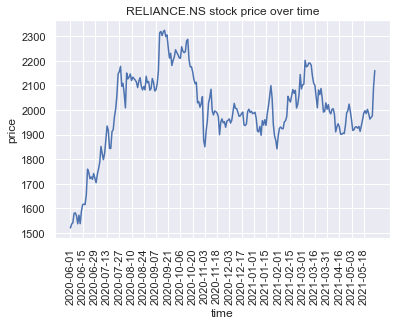

In [9]:
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,df.shape[0], 10), df['Date'][0:df.shape[0]:10], rotation = 'vertical')
plt.title("{} stock price over time".format(file_name[:-4]))
plt.xlabel("time")
plt.ylabel("price")
plt.savefig("Reliance Price Plot", bbox_inches = 'tight')
plt.show()

In [10]:
df_des = pd.DataFrame(df.Close).describe()
df_des

,Close
count,250.000000
mean,1999.827009
std,161.924190
min,1520.349976
25%,1931.875031
50%,1995.950012
75%,2106.712463
max,2324.550049


In [11]:
print("standard_deviation: ", df_des.iloc[2,0])

standard_deviation:  161.9241896212552


## check for non-stationarity

### mean and std deviation for different time-intervals

In [12]:
df.Close.shape

(250,)

In [13]:
#we have 250 entries, let's check for each n instances
n = 10

In [14]:
mean = []
std = []

In [15]:
index = 0

In [16]:
#0 to 49
df.Close.iloc[index:index+n].describe()

count      10.000000
mean     1556.450000
std        24.319568
min      1520.349976
25%      1537.287506
50%      1555.575012
75%      1577.887543
max      1588.800049
Name: Close, dtype: float64

In [17]:
df.Close.iloc[index:index+n].describe().iloc[1]

1556.4499999

In [18]:
xlabel = []

In [19]:
for i in range(int(200/n)):
    mean.append(df.Close.iloc[index:index+n].describe().iloc[1])
    std.append(df.Close.iloc[index:index+n].describe().iloc[2])
    xlabel.append("{} to {}".format(df.Date[index], df.Date[index+n]))
    index += n

In [20]:
mean

[1556.4499999,
 1691.7350096000002,
 1788.8650025000002,
 1955.0499999000003,
 2117.3100098,
 2113.7450686,
 2102.7400147,
 2253.5250244999997,
 2221.3800049,
 2230.4300049000003,
 2053.4399902,
 1984.9849974,
 1951.7850096999998,
 1984.4700074,
 1976.5700074000001,
 1945.7250001000004,
 1969.5999877,
 1957.9000122000002,
 2064.605005,
 2157.4950196]

In [21]:
std

[24.31956849195566,
 59.09322302353997,
 57.14714580795402,
 93.99023083563169,
 49.70209908924782,
 17.757827337279767,
 21.140098163031467,
 96.41383454866124,
 21.698392956623803,
 38.799702821716124,
 79.14177132734575,
 67.26413987072098,
 23.912135422145834,
 24.933054542903122,
 25.74530543107827,
 32.101509729224574,
 85.15069601139845,
 52.56852107478883,
 38.53136453104736,
 39.65346570759925]

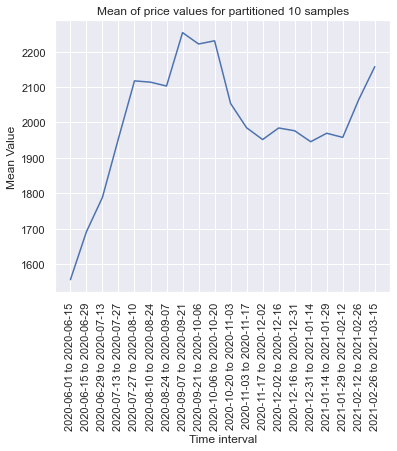

In [22]:
plt.figure(figsize=(6,5))
plt.plot(mean)
plt.title("Mean of price values for partitioned {} samples".format(n))
plt.xticks([i for i in range(int(200/n))], xlabel, rotation="vertical")
plt.xlabel("Time interval")
plt.ylabel("Mean Value")
plt.savefig("price mean plot", bbox_inches = 'tight')
plt.show()

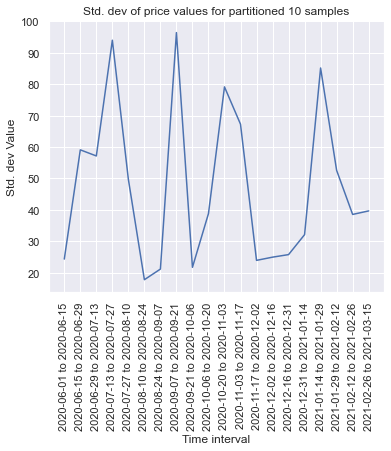

In [23]:
plt.figure(figsize=(6,5))
plt.plot(std)
plt.title("Std. dev of price values for partitioned {} samples".format(n))
plt.xticks([i for i in range(int(200/n))], xlabel, rotation="vertical")
plt.xlabel("Time interval")
plt.ylabel("Std. dev Value")
plt.savefig("price std dev plot", bbox_inches = 'tight')
plt.show()

### ADF test

In [24]:
#check if time-series is statonary

from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Close[:200], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -2.7303377795002888
n_lags: 0.06893401954962892
p-value: 0.06893401954962892
Critial Values:
   1%, -3.4636447617687436
Critial Values:
   5%, -2.8761761179270766
Critial Values:
   10%, -2.57457158581854


In [25]:
##suggests non-stationary data

## making dataset stationary for ARMA model fitting

In [26]:
#we need to consider differencing; value of d?? 

In [27]:
#d
import pmdarima
pmdarima.arima.ndiffs(df.Close)

1

In [28]:
#suggests data will be stationary after 1st order differencing

#### 1st order differencing

In [29]:
df1 = df.Close[:200].diff()

In [30]:
df1.shape

(200,)

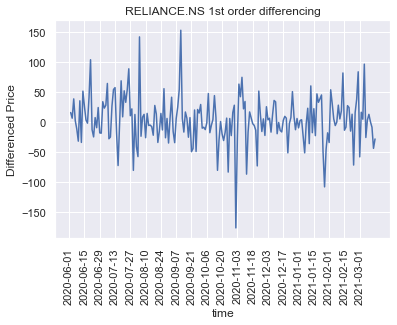

In [31]:
plt.plot(df1)
plt.xticks(np.arange(0,df1.shape[0], 10), df['Date'][0:df1.shape[0]:10], rotation = 'vertical')
plt.title("{} 1st order differencing".format(file_name[:-4]))
plt.xlabel("time")
plt.ylabel("Differenced Price")
plt.savefig("1st-differenced price", bbox_inches = 'tight')
plt.show()

In [32]:
mean = []
std = []
index = 0

In [33]:
for i in range(int(200/n)):
    mean.append(df1.iloc[index:index+n].describe().iloc[1])
    std.append(df1.iloc[index:index+n].describe().iloc[2])
    #xlabel.append("{} to {}".format(df.Date[index], df.Date[index+n]))
    index += n

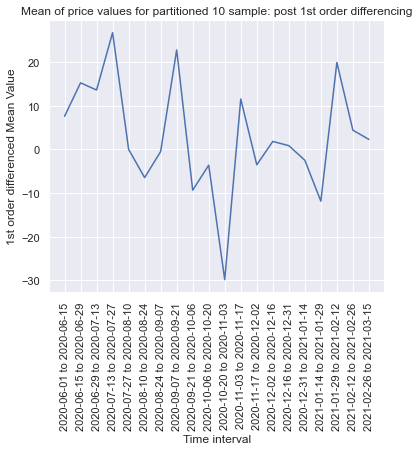

In [34]:
plt.figure(figsize=(6,5))
plt.plot(mean)
plt.title("Mean of price values for partitioned {} sample: post 1st order differencing".format(n))
plt.xticks([i for i in range(int(200/n))], xlabel, rotation="vertical")
plt.xlabel("Time interval")
plt.ylabel("1st order differenced Mean Value")
plt.savefig("1st-differenced price mean", bbox_inches = 'tight')
plt.show()

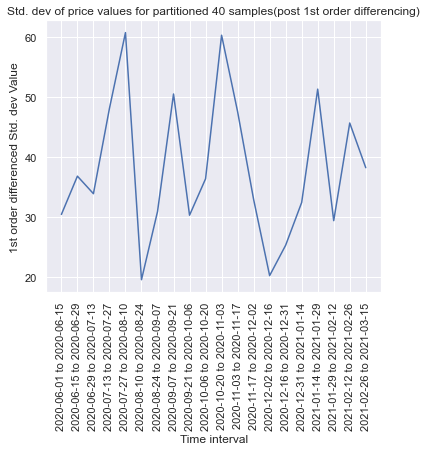

In [35]:
plt.figure(figsize=(6,5))
plt.plot(std)
plt.title("Std. dev of price values for partitioned 40 samples(post 1st order differencing)")
plt.xticks([i for i in range(int(200/n))], xlabel, rotation="vertical")
plt.xlabel("Time interval")
plt.ylabel("1st order differenced Std. dev Value")
plt.savefig("1st-differenced price std dev", bbox_inches = 'tight')
plt.show()

In [36]:
#ADF-test
result = adfuller(df1[1:200], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -13.229492915181003
n_lags: 9.649278437246728e-25
p-value: 9.649278437246728e-25
Critial Values:
   1%, -3.4638151713286316
Critial Values:
   5%, -2.876250632135043
Critial Values:
   10%, -2.574611347821651


In [37]:
#d = 1

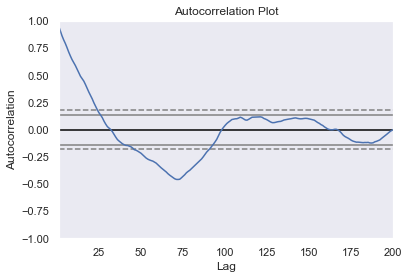

In [38]:
#q value
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Close[:200])
plt.title("Autocorrelation Plot")
plt.savefig("Autocorrelation fn plot", bbox_inches = 'tight')

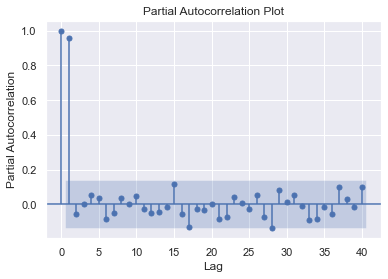

In [39]:
#p
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.Close[:200], lags = 40);
plt.title("Partial Autocorrelation Plot")
plt.ylabel("Partial Autocorrelation")
plt.xlabel("Lag")
plt.savefig("Partial Autocorrelation fn plot", bbox_inches = 'tight')

In [40]:
# p = 4,5,6

for i in range(1, 7):
    corr, _ = pearsonr(df.Close[i:], df.Close[:-i])
    r2 = corr**2
    plt.figure(figsize=(5,4))
    lag_plot(df['Close'], lag=i, c='b', label = "R2: {}".format(round(r2,2)))
    plt.title('{} Stock - Autocorrelation plot with lag = {}'.format(file_name[:-4], i))
    plt.legend()
    plt.show()

In [41]:
train_f = 0.8

train_data, test1_data = df[0:int(len(df)*train_f)], df[int(len(df)*train_f):]
training_data = train_data['Close']
test_data = test1_data['Close']
test_set_range = df[int(len(df)*train_f):].index

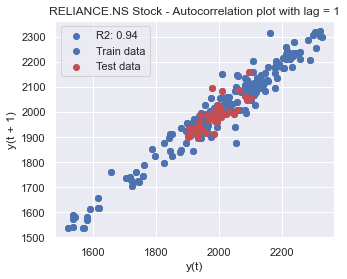

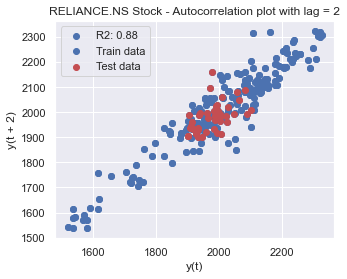

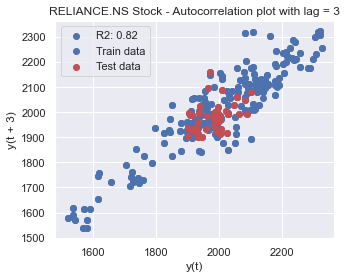

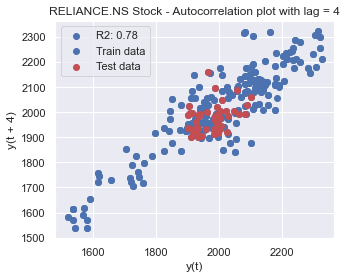

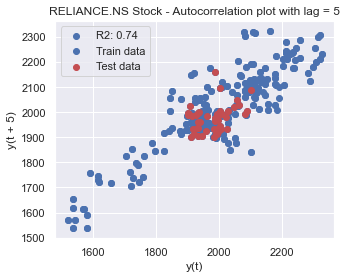

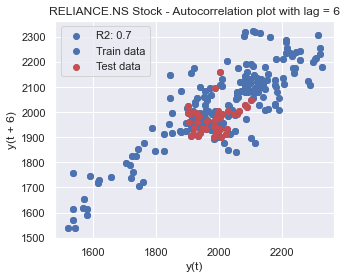

In [42]:
for i in range(1, 7):
    corr, _ = pearsonr(df.Close[i:], df.Close[:-i])
    r2 = corr**2
    plt.figure(figsize=(5,4))
    lag_plot(df['Close'], lag=i, c='b', label = "R2: {}".format(round(r2,2)))
    lag_plot(training_data, lag=i, c='b', label = "Train data")
    lag_plot(test_data, lag=i, c='r', label = "Test data")
    plt.title('{} Stock - Autocorrelation plot with lag = {}'.format(file_name[:-4], i))
    plt.legend()
    plt.savefig("Complete data Lag {} plot".format(i), bbox_inches = 'tight')
    plt.show()

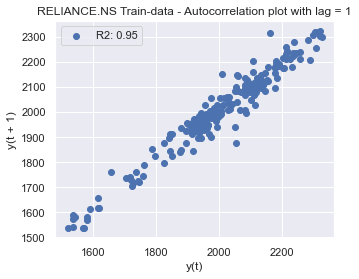

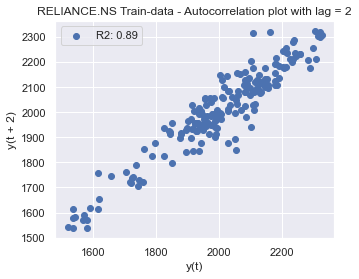

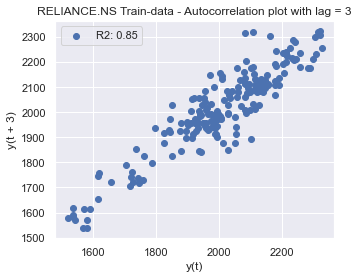

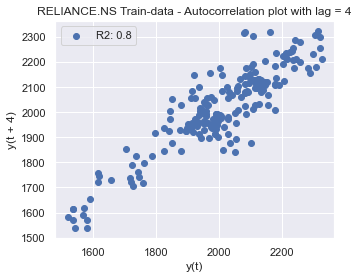

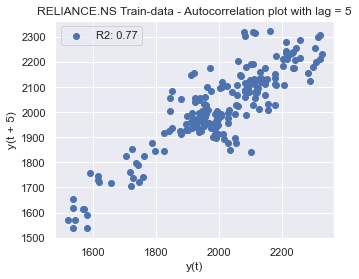

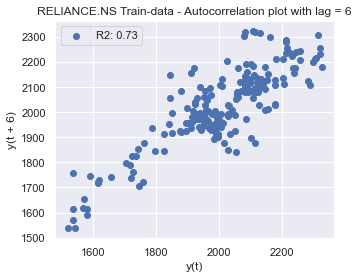

In [43]:
for i in range(1, 7):
    corr, _ = pearsonr(training_data[i:], training_data[:-i])
    r2 = corr**2
    plt.figure(figsize=(5,4))
    lag_plot(training_data, lag=i, c='b', label = "R2: {}".format(round(r2,2)))
    plt.title('{} Train-data - Autocorrelation plot with lag = {}'.format(file_name[:-4], i))
    plt.legend()
    plt.savefig("Train data Lag {} plot".format(i), bbox_inches = 'tight')
    plt.show()

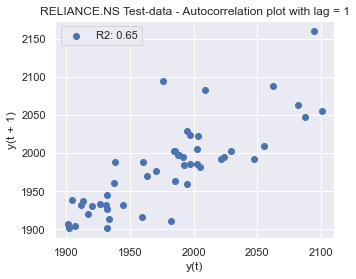

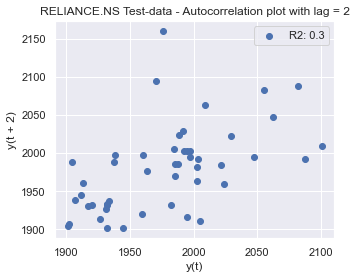

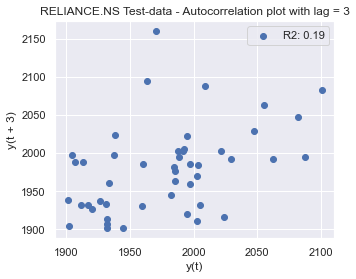

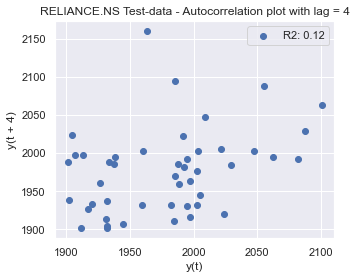

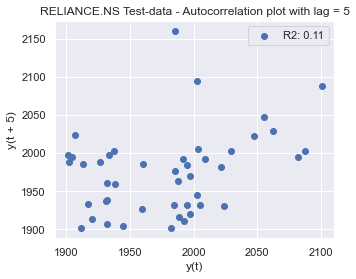

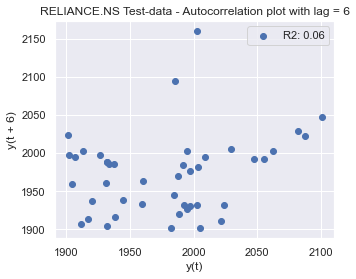

In [44]:
for i in range(1, 7):
    corr, _ = pearsonr(test_data[i:], test_data[:-i])
    r2 = corr**2
    plt.figure(figsize=(5,4))
    lag_plot(test_data, lag=i, c='b', label = "R2: {}".format(round(r2,2)))
    plt.title('{} Test-data - Autocorrelation plot with lag = {}'.format(file_name[:-4], i))
    plt.legend()
    plt.savefig("Test data Lag {} plot".format(i), bbox_inches = 'tight')
    plt.show()

# model parameters cross-validation

In [45]:
#(p,d,q) = (2,1,1)
params = [(2,1,0), (3,1,0), (4,1,0), (5,1,0), (6, 1, 0), (2,1,1), (3,1,1), (4,1,1), (5,1,1), (6,1,1), (5,2,1), (5,2,0)]

In [46]:
import warnings #suppress future warning
warnings.simplefilter(action='ignore', category=FutureWarning)

with warnings.catch_warnings():
	# ignore all caught warnings
	warnings.filterwarnings("ignore")

## Error Analysis for difft. combinations of hyperparameters

Mean absolute percentage error for (2, 1, 0) is: 1.25%
Mean square error for (2, 1, 0) is: 1127.32
same_direction percentage: 55.1%


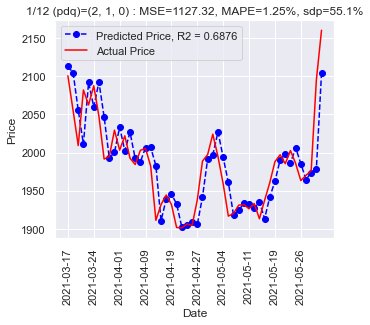

Mean absolute percentage error for (3, 1, 0) is: 1.25%
Mean square error for (3, 1, 0) is: 1123.46
same_direction percentage: 55.1%


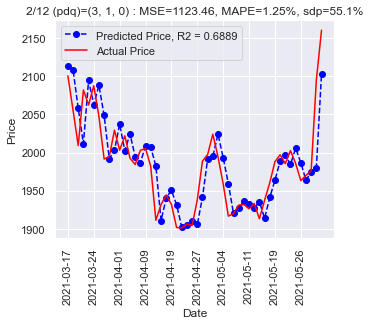

Mean absolute percentage error for (4, 1, 0) is: 1.25%
Mean square error for (4, 1, 0) is: 1115.25
same_direction percentage: 61.22%


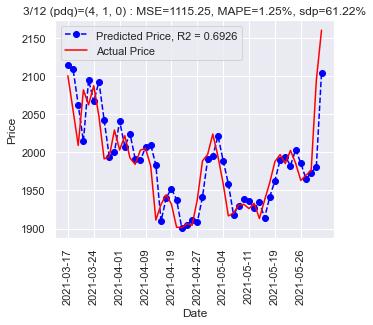

Mean absolute percentage error for (5, 1, 0) is: 1.25%
Mean square error for (5, 1, 0) is: 1114.78
same_direction percentage: 63.27%


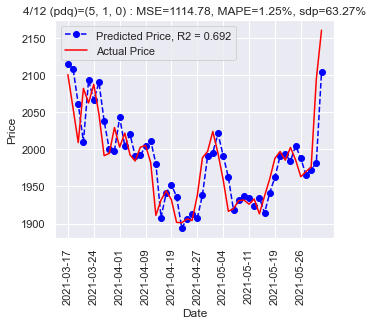

Mean absolute percentage error for (6, 1, 0) is: 1.26%
Mean square error for (6, 1, 0) is: 1118.55
same_direction percentage: 63.27%


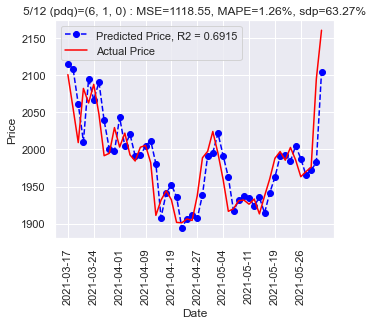

Mean absolute percentage error for (2, 1, 1) is: 1.25%
Mean square error for (2, 1, 1) is: 1126.69
same_direction percentage: 61.22%


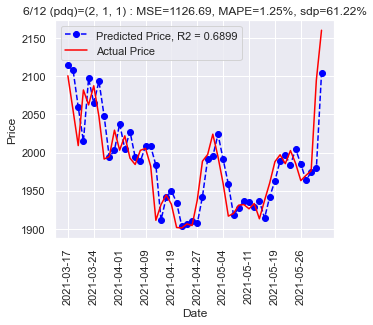

Mean absolute percentage error for (3, 1, 1) is: 1.26%
Mean square error for (3, 1, 1) is: 1124.84
same_direction percentage: 57.14%


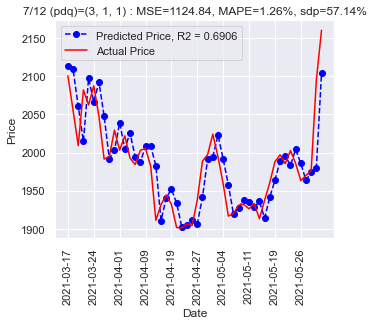

Mean absolute percentage error for (4, 1, 1) is: 1.25%
Mean square error for (4, 1, 1) is: 1117.95
same_direction percentage: 61.22%


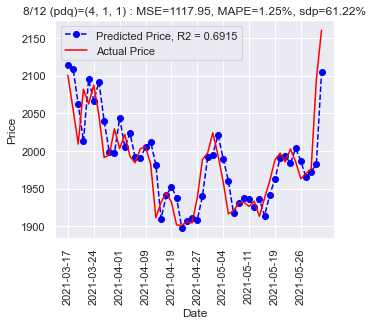

Mean absolute percentage error for (5, 1, 1) is: 1.26%
Mean square error for (5, 1, 1) is: 1116.6
same_direction percentage: 63.27%


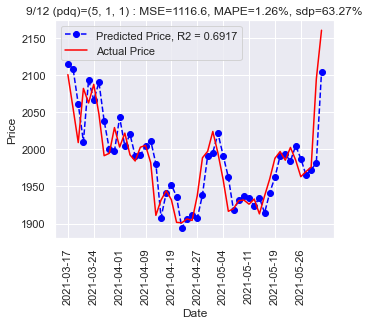

Mean absolute percentage error for (6, 1, 1) is: 1.26%
Mean square error for (6, 1, 1) is: 1121.42
same_direction percentage: 61.22%


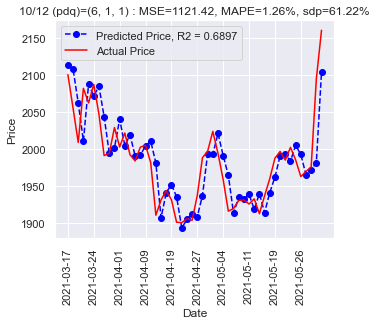

Mean absolute percentage error for (5, 2, 1) is: 1.28%
Mean square error for (5, 2, 1) is: 1145.6
same_direction percentage: 44.9%


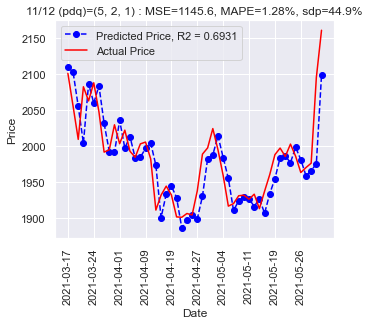

Mean absolute percentage error for (5, 2, 0) is: 1.33%
Mean square error for (5, 2, 0) is: 1236.54
same_direction percentage: 51.02%


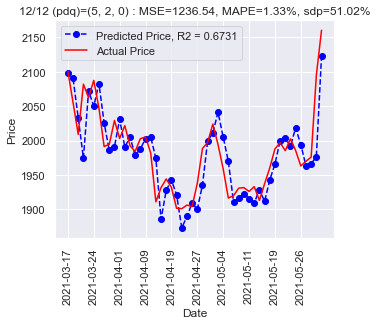

In [47]:
mapes = []
mses = []
sdps = []
labels = []
aics = []
bics = []
R2 = []

best_param = params[0]
least_mse = 100000
N_test_observations = len(test_data)
l = test_set_range[0]
r = test_set_range[-1]

training_data = training_data.values
test_data = test_data.values

#param = params[0]
for k in range(len(params)):
    param = params[k]
    history = [x for x in training_data]
    model_predictions = []
    for time_point in range(N_test_observations):
        model = ARIMA(history, order=param)
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0][0]
        model_predictions.append(yhat)
        true_test_value = test_data[time_point]
        history.append(true_test_value)
    mape =  round(sum([abs(test_data[i]-model_predictions[i])/test_data[i] for i in range(len(test_data))]) * 100/(len(test_data)), 2)
    mse = round(sum([(test_data[i]-model_predictions[i])**2 for i in range(len(test_data))])/len(test_data), 2)
    print("Mean absolute percentage error for {} is: {}%".format(param, mape))
    print("Mean square error for {} is: {}".format(param, mse))
    mapes.append(mape)
    mses.append(mse)
    aics.append(model_fit.aic)
    bics.append(model_fit.bic)
    
    if(mse < least_mse):
            least_mse = mse
            best_param = param
    
    #correct direction perecentage
    same_sign = 0
    for i in range(1, len(test_data)):
        if (test_data[i]-test_data[i-1])*(model_predictions[i]-test_data[i-1]) >= 0:
            same_sign += 1
    sdp = round((same_sign*100)/(len(test_data)-1), 2)
    print("same_direction percentage: {}%".format(round(sdp, 2)))
    sdps.append(sdp)
    
    corr,_ = pearsonr(model_predictions, test_data)
    r2 = corr**2
    R2.append(r2)
    
    

    #plotting
    plt.figure(figsize=(5,4))
    plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price, R2 = {}'.format(round(r2,4)))
    # for i in range(len(test_set_range)):
    #     if buy_marker[i] != None:
    #         plt.scatter(test_set_range[i], test_data[i], color = buy_color[i], marker = buy_marker[i])

    plt.plot(test_set_range, test_data, color='red', label='Actual Price')
    plt.title('{}/{} (pdq)={} : MSE={}, MAPE={}%, sdp={}%'.format(k+1, len(params), param, mse, mape, sdp))
    plt.xlabel('Date')
    plt.ylabel('Price')
    #inter = int((test_set_range[-1]-test_set_range[0])/4)
    plt.xticks(np.arange(l,r,5), df.Date[l:r:5], rotation='vertical')
    plt.legend()
    plt.savefig("cross-validation {}".format(param), bbox_inches = 'tight')
    plt.show()
    labels.append(param)

# check best parameter performance against R2

Mean absolute percentage error for (5, 1, 0) is: 1.25%
Mean square error for (5, 1, 0) is: 1114.78
same_direction percentage: 63.27%
R2 is:  0.6919564927475008


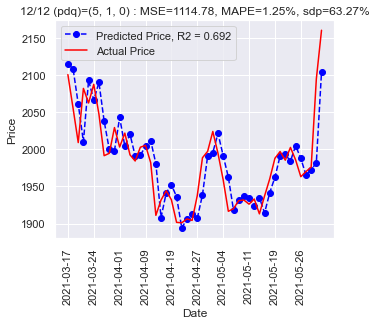

In [48]:
param = best_param
history = [x for x in training_data]
model_predictions = []
for time_point in range(N_test_observations):
    model = ARIMA(history, order=param)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0][0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
mape =  round(sum([abs(test_data[i]-model_predictions[i])/test_data[i] for i in range(len(test_data))]) * 100/(len(test_data)), 2)
mse = round(sum([(test_data[i]-model_predictions[i])**2 for i in range(len(test_data))])/len(test_data), 2)
print("Mean absolute percentage error for {} is: {}%".format(param, mape))
print("Mean square error for {} is: {}".format(param, mse))




#correct direction perecentage
same_sign = 0
for i in range(1, len(test_data)):
    if (test_data[i]-test_data[i-1])*(model_predictions[i]-test_data[i-1]) >= 0:
        same_sign += 1
sdp = round((same_sign*100)/(len(test_data)-1), 2)
print("same_direction percentage: {}%".format(round(sdp, 2)))

corr,_ = pearsonr(model_predictions, test_data)
r2 = corr**2
print("R2 is: ", r2)



#plotting
plt.figure(figsize=(5,4))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price, R2 = {}'.format(round(r2,4)))
# for i in range(len(test_set_range)):
#     if buy_marker[i] != None:
#         plt.scatter(test_set_range[i], test_data[i], color = buy_color[i], marker = buy_marker[i])

plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('{}/{} (pdq)={} : MSE={}, MAPE={}%, sdp={}%'.format(k+1, len(params), param, mse, mape, sdp))
plt.xlabel('Date')
plt.ylabel('Price')
#inter = int((test_set_range[-1]-test_set_range[0])/4)
plt.xticks(np.arange(l,r,5), df.Date[l:r:5], rotation='vertical')
plt.legend()
plt.show()

In [49]:
r2

0.6919564927475008

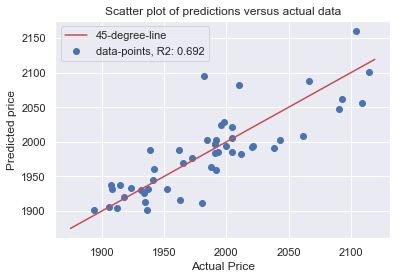

In [50]:
plt.figure()
plt.scatter(model_predictions, test_data, label = "data-points, R2: {}".format(round(r2,4)), color = 'b')
plt.plot([1875+i for i in range(245)], [1875+i for i in range(245)], label = "45-degree-line", color = 'r')
plt.legend()
plt.title("Scatter plot of predictions versus actual data")
plt.ylabel("Predicted price")
plt.xlabel("Actual Price")
plt.savefig("Scatter plot of pred Vs Act Data", bbox_inches = 'tight')
plt.show()

### error plots

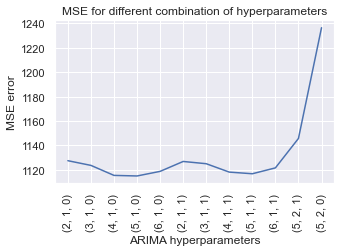

In [51]:
plt.figure(figsize=(5,3))
plt.plot(mses)
plt.xticks([i for i in range(len(params))], labels, rotation='vertical')
plt.ylabel("MSE error")
plt.xlabel("ARIMA hyperparameters")
plt.title("MSE for different combination of hyperparameters")
plt.savefig("MSE plot", bbox_inches = 'tight')
plt.show()

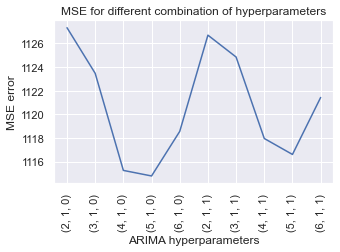

In [52]:
n_skip = 2
plt.figure(figsize=(5,3))
plt.plot(mses[:-n_skip])
plt.xticks([i for i in range(len(params)-n_skip)], labels[:-n_skip], rotation='vertical')
plt.ylabel("MSE error")
plt.xlabel("ARIMA hyperparameters")
plt.title("MSE for different combination of hyperparameters")
plt.savefig("MSE trimmed plot", bbox_inches = 'tight')
plt.show()

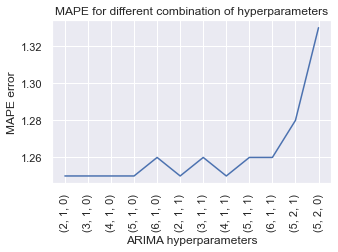

In [53]:
plt.figure(figsize=(5,3))
plt.plot(mapes)
plt.xticks([i for i in range(len(params))], labels, rotation='vertical')
plt.ylabel("MAPE error")
plt.xlabel("ARIMA hyperparameters")
plt.title("MAPE for different combination of hyperparameters")
plt.savefig("MAPE plot", bbox_inches = 'tight')
plt.show()

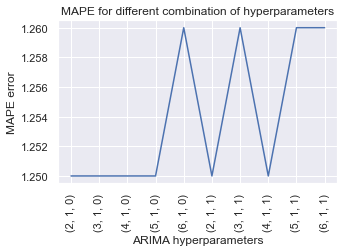

In [54]:
n_skip = 2
plt.figure(figsize=(5,3))
plt.plot(mapes[:-n_skip])
plt.xticks([i for i in range(len(params)-n_skip)], labels[:-n_skip], rotation='vertical')
plt.ylabel("MAPE error")
plt.xlabel("ARIMA hyperparameters")
plt.title("MAPE for different combination of hyperparameters")
plt.savefig("MAPE trimmed plot", bbox_inches = 'tight')
plt.show()

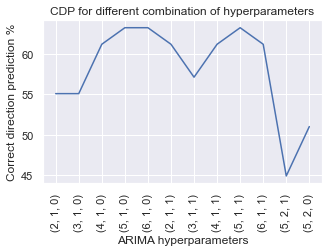

In [55]:
plt.figure(figsize=(5,3))
plt.plot(sdps)
plt.xticks([i for i in range(len(params))], labels, rotation='vertical')
plt.ylabel("Correct direction prediction %")
plt.xlabel("ARIMA hyperparameters")
plt.title("CDP for different combination of hyperparameters")
plt.savefig("CDP plot", bbox_inches = 'tight')
plt.show()

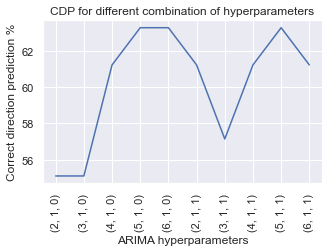

In [56]:
n_skip = 2
plt.figure(figsize=(5,3))
plt.plot(sdps[:-n_skip])
plt.xticks([i for i in range(len(params)-n_skip)], labels[:-n_skip], rotation='vertical')
plt.ylabel("Correct direction prediction %")
plt.xlabel("ARIMA hyperparameters")
plt.title("CDP for different combination of hyperparameters")
plt.savefig("CDP trimmed plot", bbox_inches = 'tight')
plt.show()

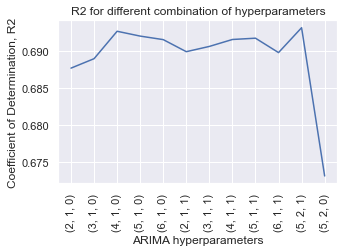

In [57]:
plt.figure(figsize=(5,3))
plt.plot(R2)
plt.xticks([i for i in range(len(params))], labels, rotation='vertical')
plt.ylabel("Coefficient of Determination, R2")
plt.xlabel("ARIMA hyperparameters")
plt.title("R2 for different combination of hyperparameters")
plt.savefig("R2 plot", bbox_inches = 'tight')
plt.show()

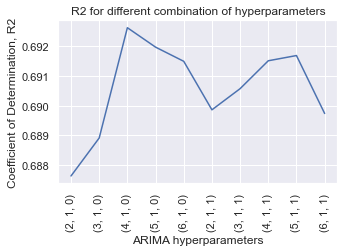

In [58]:
n_skip = 2
plt.figure(figsize=(5,3))
plt.plot(R2[:-n_skip])
plt.xticks([i for i in range(len(params)-n_skip)], labels[:-n_skip], rotation='vertical')
plt.ylabel("Coefficient of Determination, R2")
plt.xlabel("ARIMA hyperparameters")
plt.title("R2 for different combination of hyperparameters")
plt.savefig("R2 trimmed plot", bbox_inches = 'tight')
plt.show()

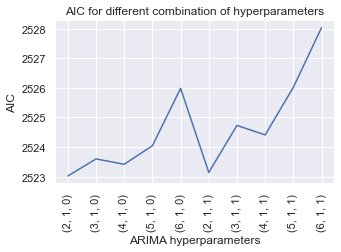

In [59]:
n_skip = 2
plt.figure(figsize=(5,3))
plt.plot(aics[:-n_skip])
plt.xticks([i for i in range(len(params)-n_skip)], labels[:-n_skip], rotation='vertical')
plt.ylabel("AIC")
plt.xlabel("ARIMA hyperparameters")
plt.title("AIC for different combination of hyperparameters")
plt.savefig("AIC plot", bbox_inches = 'tight')
plt.show()

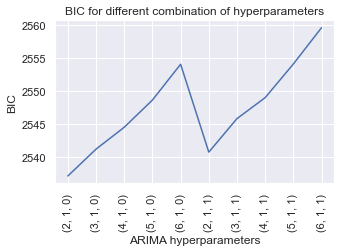

In [60]:
n_skip = 2
plt.figure(figsize=(5,3))
plt.plot(bics[:-n_skip])
plt.xticks([i for i in range(len(params)-n_skip)], labels[:-n_skip], rotation='vertical')
plt.ylabel("BIC")
plt.xlabel("ARIMA hyperparameters")
plt.title("BIC for different combination of hyperparameters")
plt.savefig("BIC plot", bbox_inches = 'tight')
plt.show()

In [61]:
print("ARIMA optimal (p,d,q)={} with MSE of {}".format(best_param, least_mse))

ARIMA optimal (p,d,q)=(5, 1, 0) with MSE of 1114.78


## Trading strategy planning on the most-optimal hyperparameters

In [62]:
#train_f = 0.8
#best_param = (5,1,0)
p,d,q = best_param

investment = 1000000 ##initial amount invested

capital = investment ##running capital
stocks = 0;

portfolio = []

train_data, test1_data = df[0:int(len(df)*train_f)], df[int(len(df)*train_f):]
training_data = train_data['Close'].values
test_data = test1_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

running_ir = [] #rir running idle return
stocks_initial = int(capital/test_data[0])
cash_initial = capital - stocks_initial * test_data[0]

buy_marker = []
buy_color = []

for time_point in range(N_test_observations):
    mkr = None #buy, sell or do nothing
    clr = None #buy_clr do nothing
    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0][0]
    #print("Loop")
    if(time_point > 0):
        if(yhat > 1.002*test_data[time_point-1] and capital > test_data[time_point-1]):
            new_stocks = int(min(capital, investment/5)/test_data[time_point-1])
            capital -= (new_stocks * test_data[time_point-1])
            stocks += new_stocks
            print("{}: Worth after buying: ".format(df.Date[int(len(df)*train_f)+time_point]), capital + stocks*test_data[time_point-1], "Capital: ", capital, "Stocks: ", stocks)
            mkr = 6
            clr = 'g'
        elif(yhat < 0.998*test_data[time_point-1] and stocks > 0):
            capital += (int(stocks/3) * test_data[time_point-1])
            stocks = stocks - int(stocks/3)
            print("{}: Worth after selling: ".format(df.Date[int(len(df)*train_f)+time_point]), capital + stocks*test_data[time_point-1], "Capital: ", capital, "Stocks: ", stocks)
            mkr = 7
            clr = 'r'
    
    buy_marker.append(mkr)
    buy_color.append(clr)
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    portfolio.append((capital + stocks*test_data[time_point]-investment)/investment *100)
    running_ir.append((cash_initial + stocks_initial * test_data[time_point]-investment)/investment * 100)


2021-03-16: Worth after buying:  1000000.0 Capital:  800442.99069 Stocks:  95
2021-03-17: Worth after buying:  995701.25 Capital:  601074.031184 Stocks:  192
2021-03-19: Worth after buying:  1000818.031184 Capital:  401202.03118399996 Stocks:  288
2021-03-24: Worth after selling:  990824.445296 Capital:  597742.835888 Stocks:  192
2021-03-25: Worth after buying:  980101.22648 Capital:  398597.840788 Stocks:  292
2021-03-30: Worth after buying:  991153.455096 Capital:  199726.43598599997 Stocks:  390
2021-04-06: Worth after buying:  973603.4550959999 Capital:  1296.4310859999678 Stocks:  490
2021-04-19: Worth after selling:  933129.407076 Capital:  311273.523099 Stocks:  327
2021-04-20: Worth after buying:  932949.5809470001 Capital:  111652.77057899997 Stocks:  432
2021-04-22: Worth after buying:  935217.580947 Capital:  1081.5691869999719 Stocks:  490


In [63]:
same_sign = 0
for i in range(1, len(test_data)):
    if (test_data[i]-test_data[i-1])*(model_predictions[i]-test_data[i-1]) >= 0:
        same_sign += 1
sdp = (same_sign*100)/(len(test_data)-1)
print("same_direction percentage: {}%".format(round(sdp, 2)))

same_direction percentage: 63.27%


In [64]:
mape =  sum([abs(test_data[i]-model_predictions[i]) for i in range(len(test_data))]) * 100/(sum(test_data))
print("Mean absolute percentage error is: {}%".format(round(mape, 2)))

Mean absolute percentage error is: 1.27%


In [65]:
##Summary of the model fit
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  248
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1255.023
Method:                       css-mle   S.D. of innovations             38.147
Date:                Mon, 07 Jun 2021   AIC                           2524.046
Time:                        10:34:23   BIC                           2548.640
Sample:                             1   HQIC                          2533.946
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2503      2.234      1.007      0.314      -2.129       6.629
ar.L1.D.y      0.0567      0.064      0.881      0.378      -0.069       0.183
ar.L2.D.y     -0.0521      0.064     -0.813      0.4

In [66]:
model_fit.aic

2524.0457814054466

In [67]:
model_fit.bic

2548.6397826286016

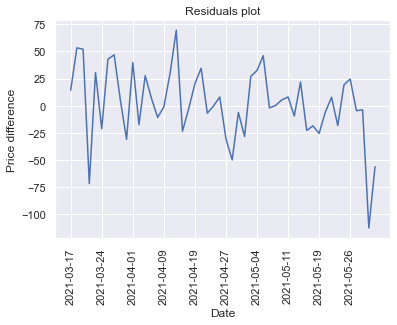

In [68]:
residuals = [model_predictions[i]-test_data[i] for i in range(len(test_data))]
test_set_range = df[int(len(df)*train_f):].index
plt.plot(test_set_range, residuals)
l = test_set_range[0]
r = test_set_range[-1]
plt.xticks(np.arange(l,r,5), df.Date[l:r:5], rotation='vertical')
plt.ylabel("Price difference")
plt.xlabel("Date")
plt.title("Residuals plot")
plt.savefig("Residuals plot", bbox_inches = 'tight')

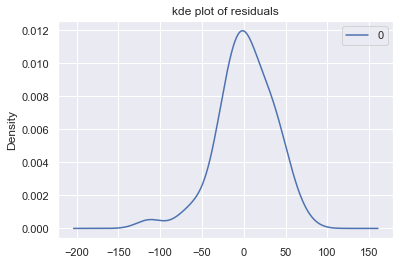

In [69]:
pd.DataFrame(residuals).plot(kind = 'kde')
plt.title("kde plot of residuals")
plt.savefig("kde plot of residuals", bbox_inches = 'tight')

In [70]:
pd.DataFrame(residuals).describe()

,0
count,50.000000
mean,1.809442
std,33.677771
min,-112.628100
25%,-18.132219
50%,0.002895
75%,26.408044
max,69.471584


In [71]:
stocks

490

In [72]:
capital

1081.5691869999719

In [73]:
wealth = stocks*test_data[-1] + capital
wealth

1059628.593197

In [74]:
corr,_ = pearsonr(model_predictions, test_data)
r2 = corr**2

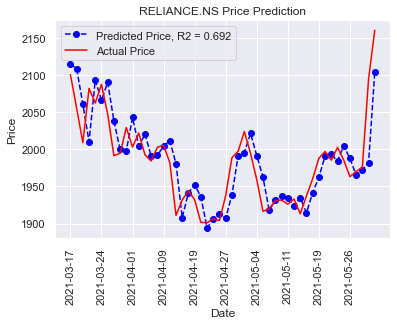

In [75]:
test_set_range = df[int(len(df)*train_f):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price, R2 = {}'.format(round(r2, 4)))
# for i in range(len(test_set_range)):
#     if buy_marker[i] != None:
#         plt.scatter(test_set_range[i], test_data[i], color = buy_color[i], marker = buy_marker[i])
    
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('{} Price Prediction'.format(file_name[:-4]))
plt.xlabel('Date')
plt.ylabel('Price')
#inter = int((test_set_range[-1]-test_set_range[0])/4)
plt.xticks(np.arange(l,r,5), df.Date[l:r:5], rotation='vertical')
plt.legend()
plt.savefig("Optimal Parameter prediction", bbox_inches = 'tight')
plt.show()

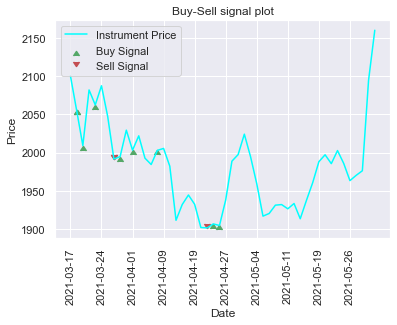

In [76]:
plt.figure()

plt.plot(test_set_range, test_data, color='cyan', label='Instrument Price')

for i in range(len(test_set_range)):
    if buy_marker[i] != None:
        plt.scatter(test_set_range[i], test_data[i], color = buy_color[i], marker = buy_marker[i])
        
for i in range(len(test_set_range)):
    if buy_marker[i]  == 6:
        plt.scatter(test_set_range[i], test_data[i], color = buy_color[i], marker = buy_marker[i], label = "Buy Signal")
        break

for i in range(len(test_set_range)):
    if buy_marker[i]  == 7:
        plt.scatter(test_set_range[i], test_data[i], color = buy_color[i], marker = buy_marker[i], label = "Sell Signal")
        break
        

plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Buy-Sell signal plot")

plt.xticks(np.arange(l,r,5), df.Date[l:r:5], rotation='vertical')
plt.legend()
plt.savefig("Buy-Sell signal", bbox_inches = 'tight')
plt.show()

In [77]:
#Wealth appreciation
def idle_return(capital, test_data):
    stocks = int(capital/test_data[0])
    cash = capital-stocks*test_data[0]
    val = cash + stocks*test_data[-1]
    val_p = (val-capital)/capital * 100
    return val_p

In [78]:
ir = idle_return(investment, test_data)
print("Idle return: ", ir)

Idle return:  2.8417176676


In [79]:
portfolio_return = (wealth-investment)/investment *100
print("portfolio_return: ", portfolio_return)

portfolio_return:  5.962859319699998


In [80]:
2.84*5

14.2

In [81]:
5.96*5

29.8

In [82]:
29.8/14.2

2.098591549295775

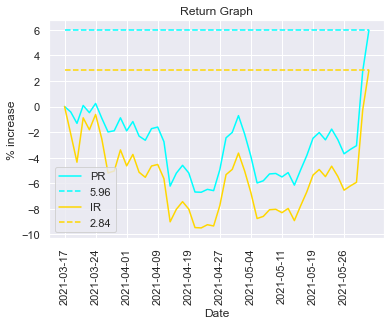

In [83]:
plt.plot(test_set_range, portfolio, label='PR', color = 'cyan')
plt.plot(test_set_range, [portfolio_return for i in range(len(test_set_range))], color = 'cyan', linestyle='dashed', label='{}'.format(round(portfolio_return,2)))
plt.plot(test_set_range, running_ir, color = 'gold', label = 'IR')
plt.plot(test_set_range, [ir for i in range(len(test_set_range))], color = 'gold', linestyle='dashed', label='{}'.format(round(ir,2)))
plt.plot()
plt.xlabel('Date')
plt.ylabel('% increase')
plt.title("Return Graph")
plt.legend()
plt.xticks(np.arange(l,r,5), df.Date[l:r:5], rotation='vertical')
plt.savefig("Return Graph", bbox_inches = 'tight')
plt.show()

In [84]:
## Last trading day data
df.iloc[-1]

Date          2021-05-31
Open              2102.0
High         2191.699951
Low          2085.050049
Close        2160.300049
Adj Close    2160.300049
Volume        27276663.0
Name: 250, dtype: object

In [85]:
model_predictions[-1]

2104.1420039552563

In [86]:
history[-1]

2160.300049

In [87]:
##Prediction for the next day(Mon: 2021-06-01) closing price??

In [88]:
model = ARIMA(history, order=best_param)
model_fit = model.fit(disp=0)
output = model_fit.forecast()
yhat = output[0]

In [89]:
output

(array([2158.76796642]),
 array([38.22939833]),
 array([[2083.83972253, 2233.6962103 ]]))

In [90]:
yhat[0]

2158.7679664154957

In [91]:
#number of buy sell points

In [92]:
exc = 0
for i in range(len(test_set_range)):
    if buy_marker[i] != None:
        exc += 1
print("no. of exchanges: ", exc)

no. of exchanges:  10


In [93]:
df.Date[0]

'2020-06-01'

In [94]:
df.Date[199]

'2021-03-12'

In [95]:
df.Date[200]

'2021-03-15'

In [98]:
len(training_data)

200

In [99]:
len(test_data)

50